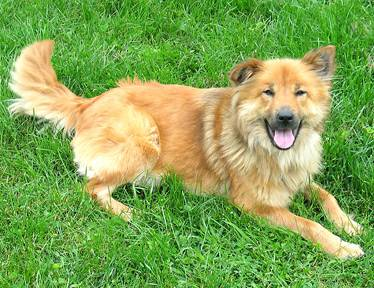

In [11]:
from IPython.display import Image
Image("data/dogscats/test/4.jpg")

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "data/dogscats/"
sz=224
arch=resnet34
bs=64

In [4]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),test_name='test')

In [5]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [7]:
learn.fit(0.01, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.05666  0.02646  0.9917 ]                         
[ 1.       0.04589  0.02416  0.99121]                         
[ 2.       0.03405  0.02587  0.99219]                         



In [ ]:
learn.precompute=False

In [ ]:
learn.fit(1e-2, 1, cycle_len=1)

In [ ]:
learn.unfreeze()
#learn.bn_freeze(True)

In [ ]:
lr=np.array([1e-4,1e-3,1e-2])

In [ ]:
learn.fit(lr, 3, cycle_len=1)

In [8]:
log_preds,y = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds), axis=0)
#accuracy(probs,y), metrics.log_loss(y, probs)

In [ ]:
learn.save('abc')

In [6]:
learn.load('abc')

FileNotFoundError: [Errno 2] No such file or directory: 'data/dogscats/models/abc.h5'

In [ ]:
#log_preds = learn.predict(is_test=False)
#metrics.log_loss(y, np.exp(log_preds[:,1:])), accuracy(log_preds[:,1:],y)
#probs = np.exp(log_preds)

In [9]:
probs[:10]

array([[ 0.00006,  0.99994],
       [ 0.00004,  0.99996],
       [ 0.99999,  0.00001],
       [ 1.     ,  0.     ],
       [ 0.99972,  0.00028],
       [ 0.00103,  0.99897],
       [ 0.00096,  0.99904],
       [ 0.99386,  0.00614],
       [ 0.     ,  1.     ],
       [ 0.     ,  1.     ]], dtype=float32)

In [ ]:
df = pd.DataFrame(probs[:,1])


In [ ]:
df.head

In [ ]:
df.index += 1

In [ ]:
SUBM = f'{PATH}sub/'
os.makedirs(SUBM, exist_ok=True)

In [ ]:
df.to_csv(f'{SUBM}subm.gz', compression='gzip')

In [ ]:
FileLink(f'{SUBM}subm.gz')